In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,auc,roc_curve
import seaborn as sns
from sklearn import metrics

In [4]:
df = pd.read_csv('framingham.csv')

In [5]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

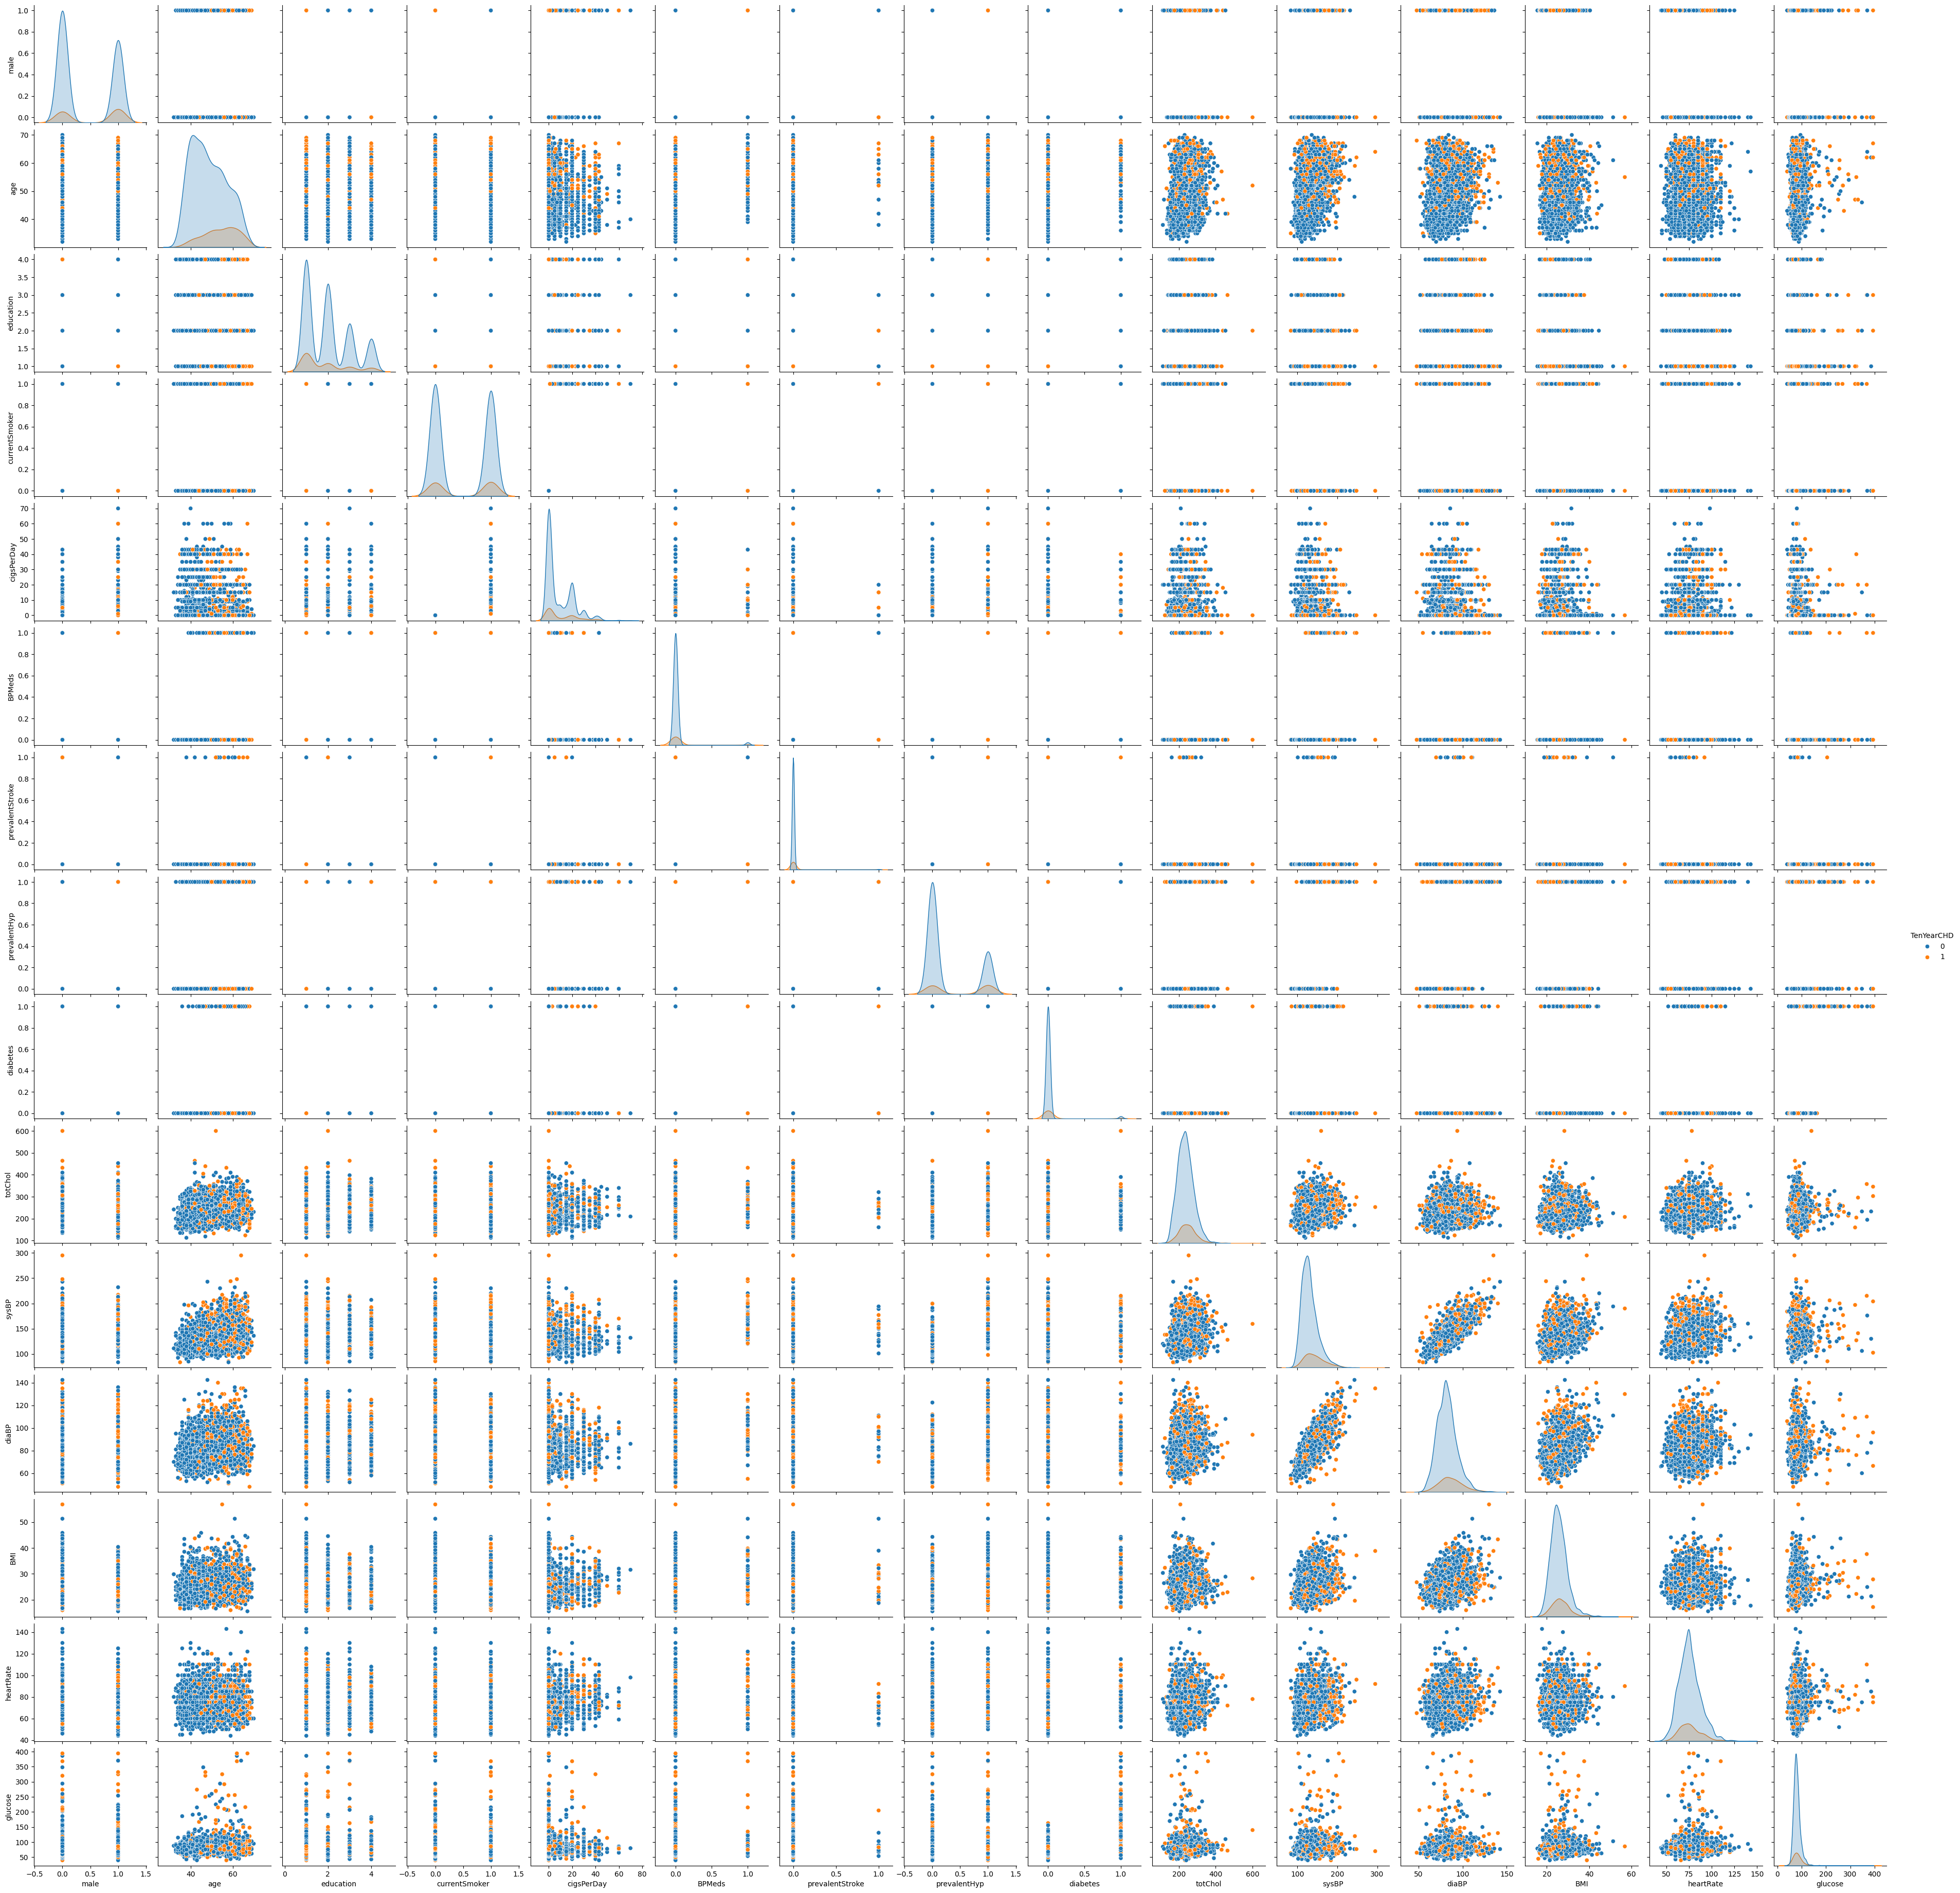

In [13]:
sns.pairplot(df,hue='TenYearCHD')

In [14]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [16]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [18]:
lr = LogisticRegression()
nb = GaussianNB()

In [20]:
model_lr = lr.fit(X_train,y_train)


/home/rahulvk/Documents/MLLAB/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
model_nb = nb.fit(X_train,y_train)

In [26]:
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

lr_metrics = evaluate_classifier(model_lr, X_test, y_test)
nb_metrics = evaluate_classifier(model_nb, X_test, y_test)

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_metrics[0]:.2f}")
print(f"Precision: {lr_metrics[1]:.2f}")
print(f"Recall: {lr_metrics[2]:.2f}")
print(f"F1-score: {lr_metrics[3]:.2f}")

print("\nNaïve Bayes Metrics:")
print(f"Accuracy: {nb_metrics[0]:.2f}")
print(f"Precision: {nb_metrics[1]:.2f}")
print(f"Recall: {nb_metrics[2]:.2f}")
print(f"F1-score: {nb_metrics[3]:.2f}")

Logistic Regression Metrics:
Accuracy: 0.85
Precision: 0.80
Recall: 0.85
F1-score: 0.79

Naïve Bayes Metrics:
Accuracy: 0.81
Precision: 0.78
Recall: 0.81
F1-score: 0.79


In [27]:
y_pred = model_lr.predict(X_test)

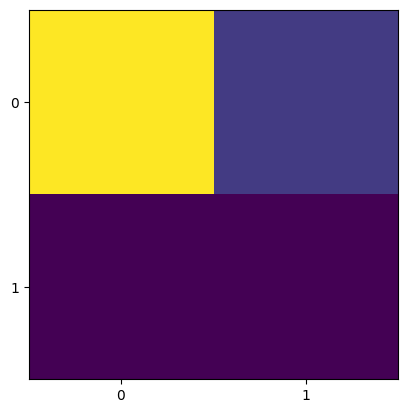

In [31]:
cm = confusion_matrix(y_pred,y_test)
classes=[0,1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.imshow(cm)